**Question 1**

1.   Upload Data to R 
2.   View the structure of Data
3.   Dimentionality
4.   Atrributes names



# **Import Dataset**

In [ ]:
#1. Load the data
data <- read.csv("/content/19.csv")

# **View the structure of Data and Dimentionality**

In [ ]:
str(data)

'data.frame':	961 obs. of  6 variables:
 $ BI.RADS : chr  "5" "4" "5" "4" ...
 $ Age     : chr  "67" "43" "58" "28" ...
 $ Shape   : chr  "3" "1" "4" "1" ...
 $ Margin  : chr  "5" "1" "5" "1" ...
 $ Density : chr  "3" "?" "3" "3" ...
 $ Severity: int  1 1 1 0 1 0 0 0 1 1 ...


# **Attribute names**

In [ ]:
names(data)

[1] "BI.RADS"  "Age"      "Shape"    "Margin"   "Density"  "Severity"

# **Summary of dataset**

In [ ]:
summary(data)

   BI.RADS              Age               Shape              Margin         
 Length:961         Length:961         Length:961         Length:961        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   Density             Severity     
 Length:961         Min.   :0.0000  
 Class :character   1st Qu.:0.0000  
 Mode  :character   Median :0.0000  
                    Mean   :0.4631  
                    3rd Qu.:1.0000  
                    Max.   :1.0000  

**Q2: Explain what attributes you are using for clustering and why**

**Q3: Apply Clustering on the dataset for several k values 3,4,5**

# **Data cleaning**

In [ ]:
df1<-data[!(data$Age=="?" | data$Shape=="?" | data$Margin=="?"   | data$Density=="?" |data$Severity=="?"),] #Margin Density 	BI.RADS
df1


,BI.RADS,Age,Shape,Margin,Density,Severity
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,5,67,3,5,3,1
3,5,58,4,5,3,1
4,4,28,1,1,3,0
9,5,57,1,5,3,1
11,5,76,1,4,3,1
12,3,42,2,1,3,1
14,4,36,3,1,2,0
15,4,60,2,1,2,0
16,4,54,1,1,3,0


# **Characters to Numeric**

In [ ]:
df1$Age  <- as.numeric(df1$Age)
df1$Shape  <- as.numeric(df1$Shape)
df1$Margin  <- as.numeric(df1$Margin)
df1$Density  <- as.numeric(df1$Density)
df1$Severity  <- as.numeric(df1$Severity)
str(df1)

'data.frame':	831 obs. of  6 variables:
 $ BI.RADS : chr  "5" "5" "4" "5" ...
 $ Age     : num  67 58 28 57 76 42 36 60 54 52 ...
 $ Shape   : num  3 4 1 1 1 2 3 2 1 3 ...
 $ Margin  : num  5 5 1 5 4 1 1 1 1 4 ...
 $ Density : num  3 3 3 3 3 3 2 2 3 3 ...
 $ Severity: num  1 1 0 1 1 1 0 0 0 0 ...


# **Optimal Number of Clusters**

In [ ]:
df2=df1[2:6]

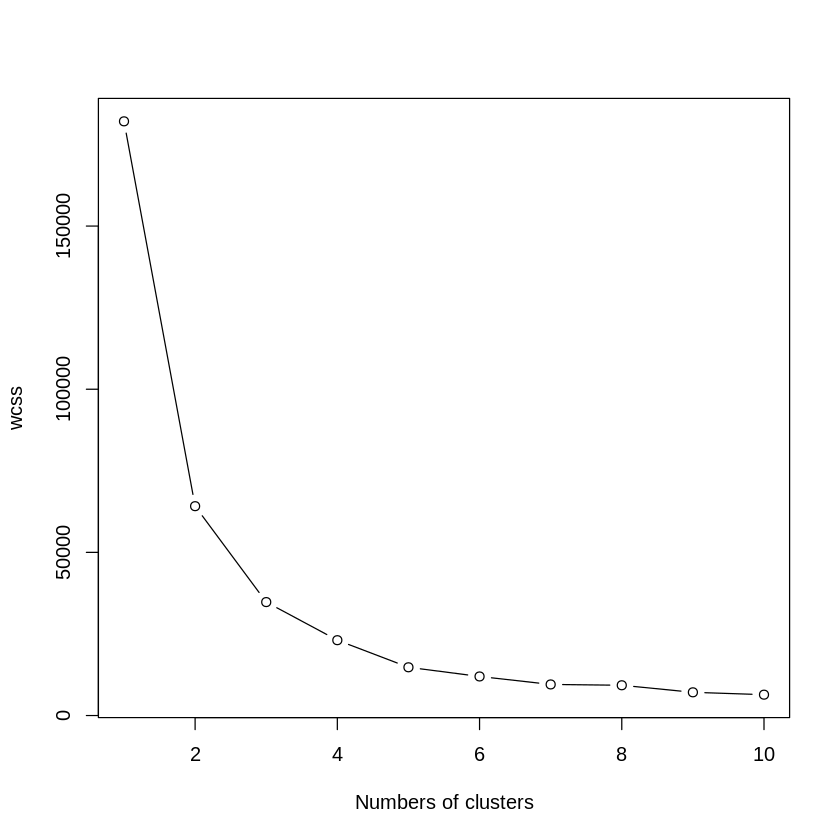

In [ ]:
wcss <- vector()
for (i in 1:10) wcss[i] <-sum(kmeans(df2,i)$withinss)
plot(1:10,wcss,type = "b",xlab="Numbers of clusters")

**Q4: Plot the model and show the centroid for each K**

# **K means with 5 Clusters**

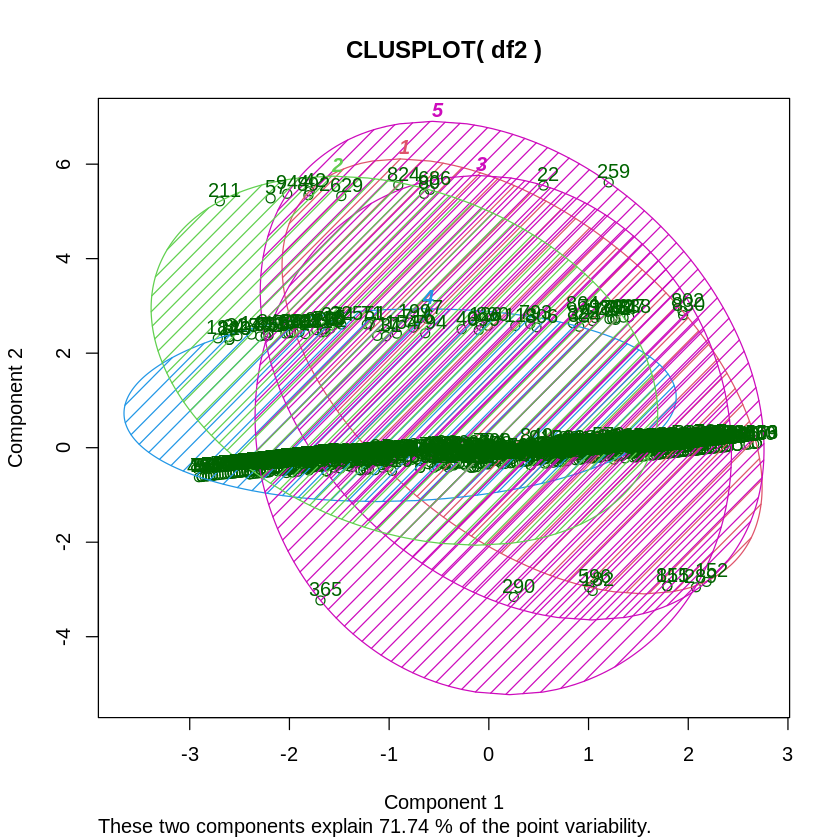

In [ ]:
kmeans <- kmeans(df2,5,iter.max=300,nstart=10)
library(cluster)
clusplot(df2,kmeans$cluster,lines=0,shade=TRUE,color=TRUE,labels=2,plotchar=FALSE,span=TRUE)

# **K means with 4 Clusters**

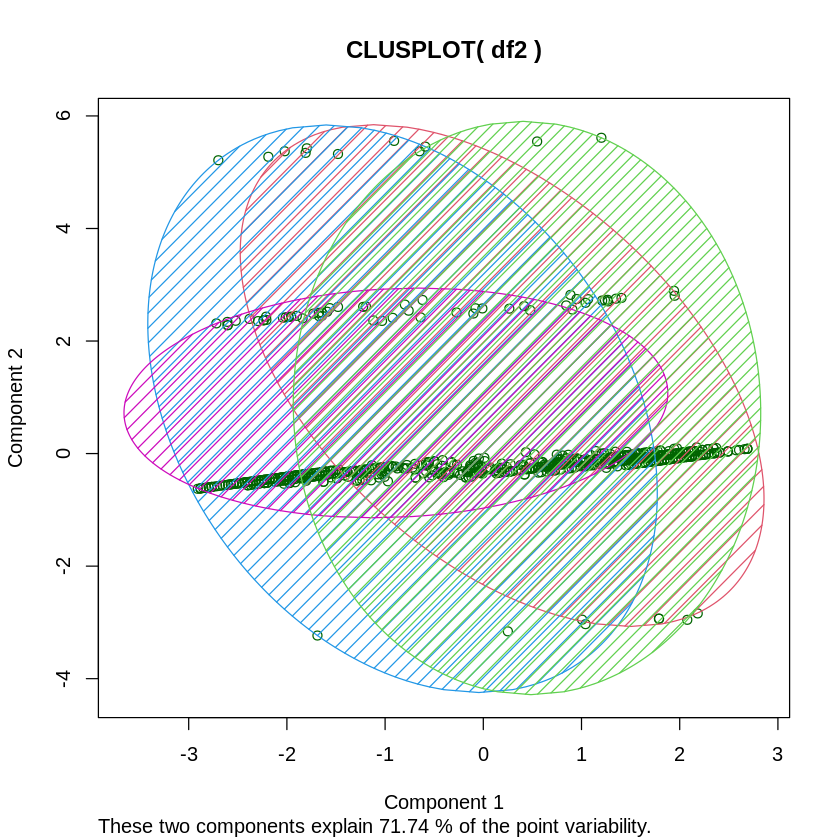

In [ ]:
kmeans <- kmeans(df2,4,iter.max=300,nstart=10)
library(cluster)
clusplot(df2,kmeans$cluster,lines=0,shade=TRUE,color=TRUE,plotchar=FALSE,span=TRUE)

# **K means with 3 Clusters**

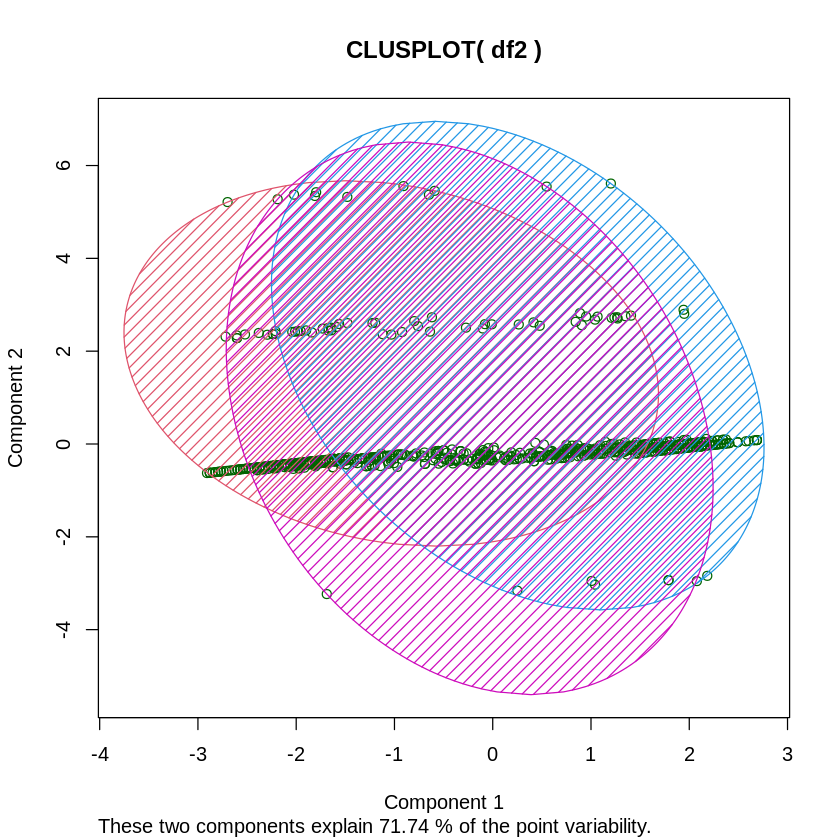

In [ ]:
kmeans <- kmeans(df2,3,iter.max=300,nstart=10)
library(cluster)
clusplot(df2,kmeans$cluster,lines=0,shade=TRUE,color=TRUE,plotchar=FALSE,span=TRUE)

# **K means with 5 Clusters after scaling**

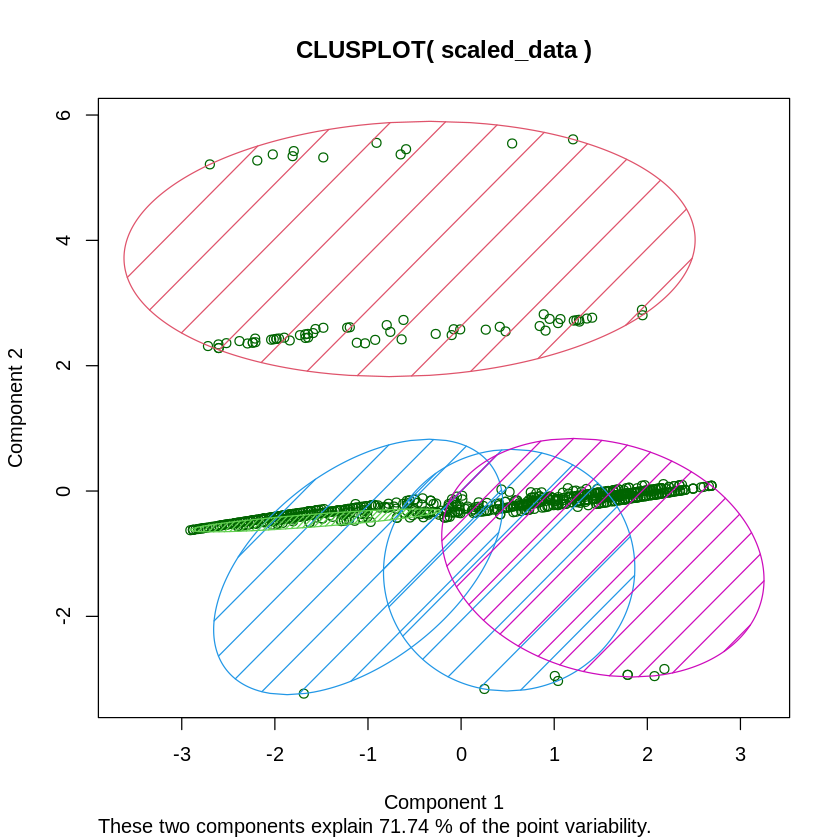

In [ ]:
scaled_data=scale(df1[2:6])
kmeans <- kmeans(scaled_data,5,iter.max=300,nstart=10)
library(cluster)
clusplot(scaled_data,kmeans$cluster,lines=0,shade=TRUE,color=TRUE,plotchar=FALSE,span=TRUE)

# **K means with 4 Clusters after scaling**

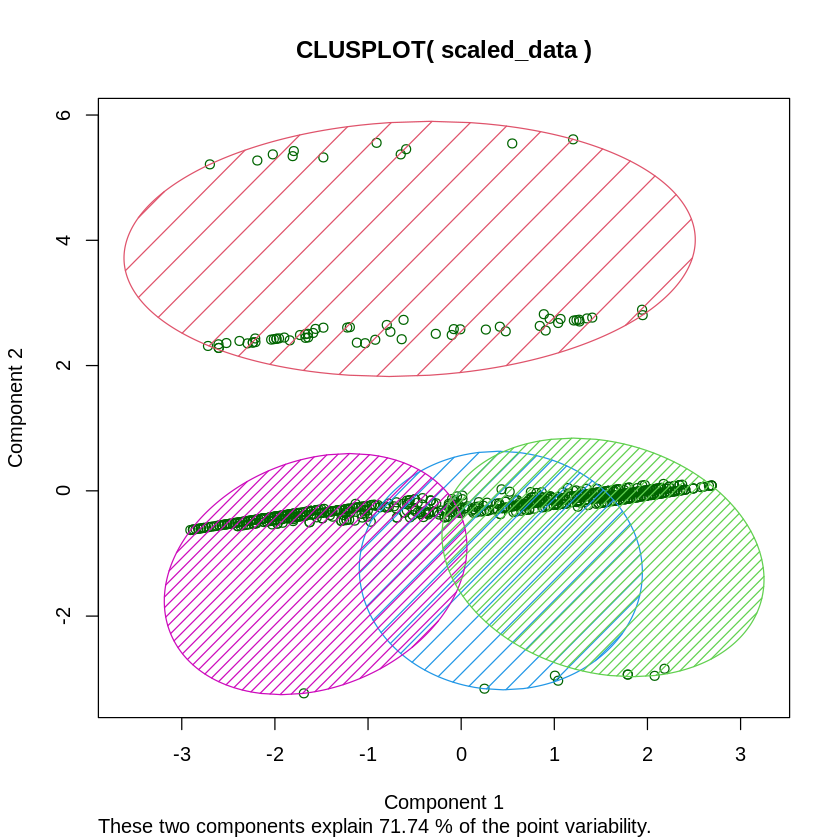

In [ ]:
kmeans <- kmeans(scaled_data,4,iter.max=300,nstart=10)
library(cluster)
clusplot(scaled_data,kmeans$cluster,lines=0,shade=TRUE,color=TRUE,plotchar=FALSE,span=TRUE)

# **K means with 3 Clusters after scaling**

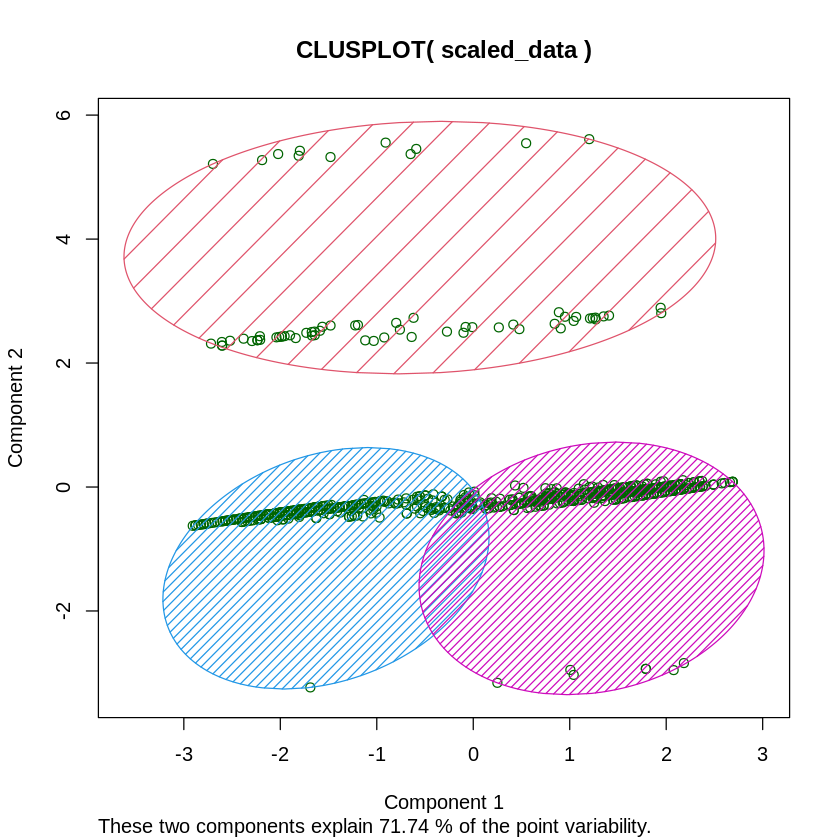

In [ ]:
kmeans <- kmeans(scaled_data,3,iter.max=300,nstart=10)
library(cluster)
clusplot(scaled_data,kmeans$cluster,lines=0,shade=TRUE,color=TRUE,plotchar=FALSE,span=TRUE)

**Q5: Select different attributes and show which ones show good clusters**

# **Select Attributes which shows better clustering results**

In [ ]:
selected=scale(df1[2:3])


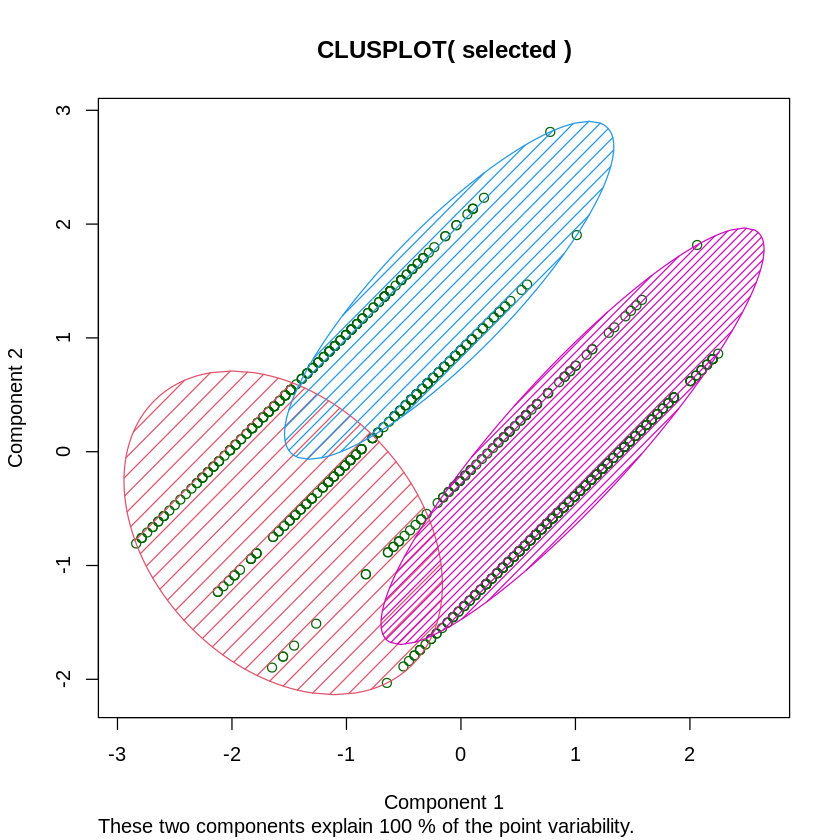

In [ ]:
kmeans <- kmeans(selected,3,iter.max=300,nstart=10)
library(cluster)
clusplot(selected,kmeans$cluster,lines=0,shade=TRUE,color=TRUE,plotchar=FALSE,span=TRUE)

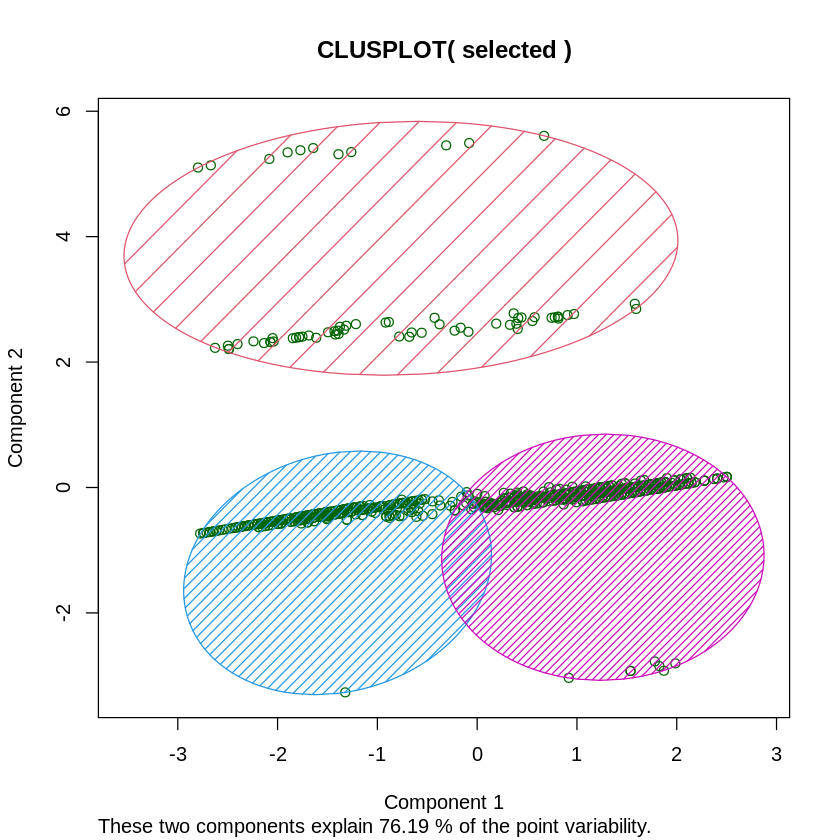

In [ ]:
selected=scale(df1[2:5])
kmeans <- kmeans(selected,3,iter.max=300,nstart=10)
library(cluster)
clusplot(selected,kmeans$cluster,lines=0,shade=TRUE,color=TRUE,plotchar=FALSE,span=TRUE)

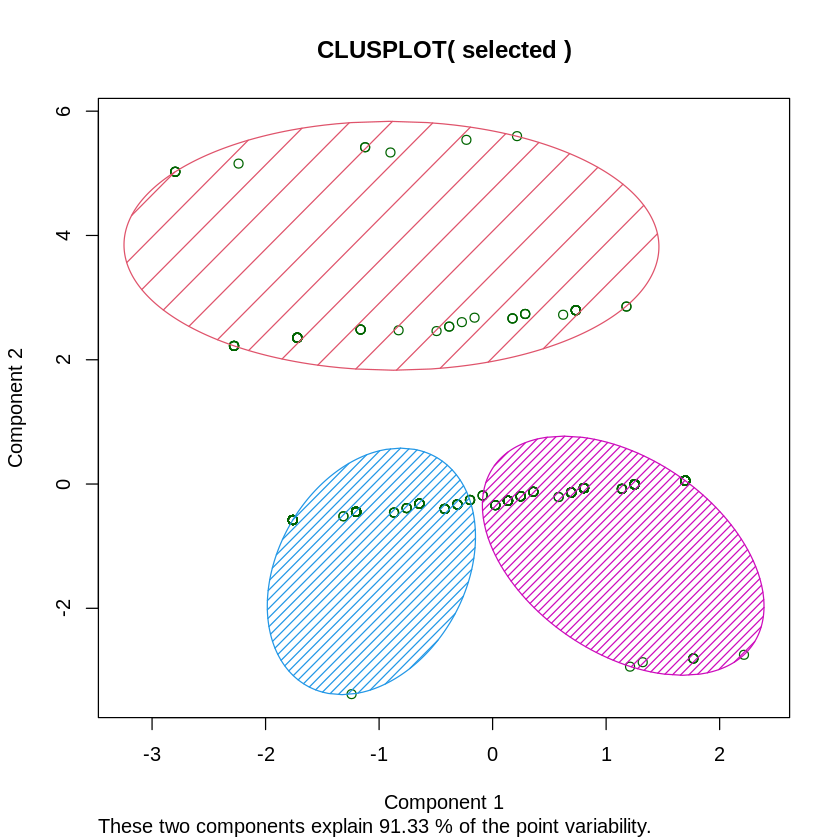

In [ ]:
selected=scale(df1[3:5])
kmeans <- kmeans(selected,3,iter.max=300,nstart=10)
library(cluster)
clusplot(selected,kmeans$cluster,lines=0,shade=TRUE,color=TRUE,plotchar=FALSE,span=TRUE)

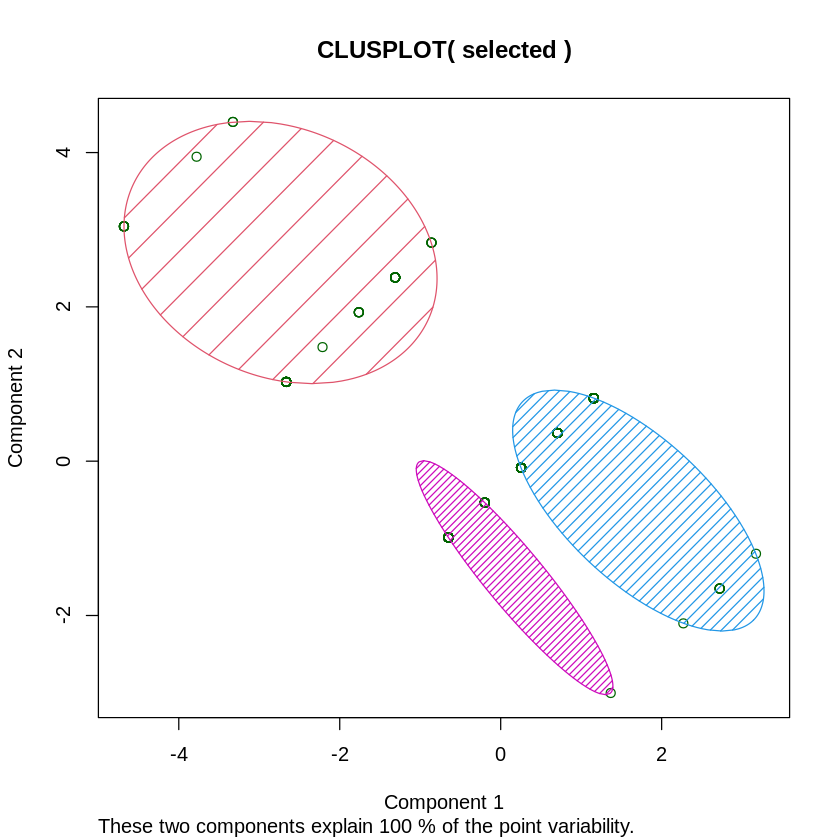

In [ ]:
selected=scale(df1[4:5])
kmeans <- kmeans(selected,3,iter.max=300,nstart=10)
library(cluster)
clusplot(selected,kmeans$cluster,lines=0,shade=TRUE,color=TRUE,plotchar=FALSE,span=TRUE)

**Q6: Find most important features**

# **Important features**

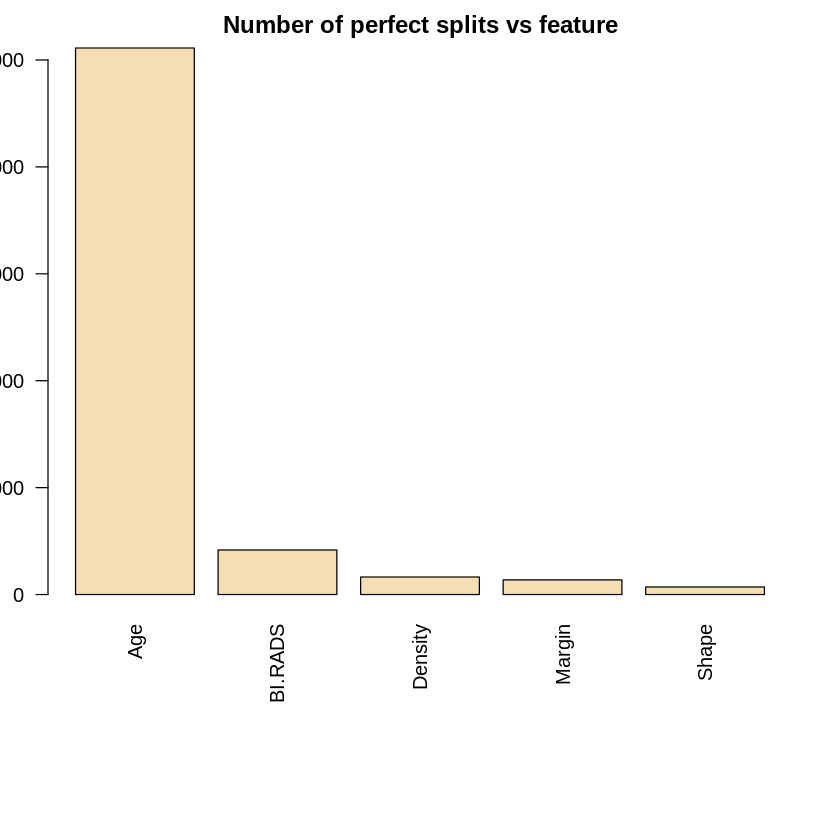

In [ ]:
number.perfect.splits <- apply(X=df1[1:5], MARGIN = 2, FUN = function(col){
t <- table(df1$Age,col)
sum(t == 0)
})
 
# Descending order of perfect splits
order <- order(number.perfect.splits,decreasing = TRUE)
number.perfect.splits <- number.perfect.splits[order]
 
# Plot graph
par(mar=c(10,2,2,2))
barplot(number.perfect.splits,
main="Number of perfect splits vs feature",
xlab="",ylab="Feature",las=2,col="wheat")

**7. Apply classification using decision tree on the most 4 important features**

# **Classification**

In [ ]:
require(tree)
#Installing libraries
install.packages('rpart')
install.packages('caret')
install.packages('rpart.plot')
install.packages('rattle')
 
#Loading libraries
library(rpart,quietly = TRUE)
library(caret,quietly = TRUE)
library(rpart.plot,quietly = TRUE)
library(rattle)


Loading required package: tree

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tree’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Cop

In [ ]:
df1<-data[!(data$Age=="?" | data$BI.RADS=="?" | data$Shape=="?" | data$Margin=="?"   | data$Density=="?" |data$Severity=="?"),] #Margin Density 	BI.RADS



In [ ]:
dataset1=df1[,c("Age","BI.RADS","Margin","Density","Severity")]
dataset1

,Age,BI.RADS,Margin,Density,Severity
,<chr>,<chr>,<chr>,<chr>,<fct>
1,67,5,5,3,1
3,58,5,5,3,1
4,28,4,1,3,0
9,57,5,5,3,1
11,76,5,4,3,1
12,42,3,1,3,1
14,36,4,1,2,0
15,60,4,1,2,0
16,54,4,1,3,0


In [ ]:
#dataset1$Severity= factor(dataset1$Severity, levels = c(0, 1))
dataset=dataset1[1:5]
# Fitting Decision Tree Classification to the Training set
# install.packages('rpart')
tree = rpart(Severity ~ ., data = dataset)
# seat_tree = tree(Sales ~ ., data = Carseats, 
#                  control = tree.control(nobs = nrow(Carseats), minsize = 10))
summary(tree)


Call:
rpart(formula = Severity ~ ., data = dataset)
  n= 830 

          CP nsplit rel error    xerror       xstd
1 0.64764268      0 1.0000000 1.0000000 0.03572912
2 0.03101737      1 0.3523573 0.3598015 0.02714471
3 0.01000000      3 0.2903226 0.3598015 0.02714471

Variable importance
BI.RADS  Margin     Age Density 
     52      27      20       1 

Node number 1: 830 observations,    complexity param=0.6476427
  predicted class=0  expected loss=0.4855422  P(node) =1
    class counts:   427   403
   probabilities: 0.514 0.486 
  left son=2 (499 obs) right son=3 (331 obs)
  Primary splits:
      BI.RADS splits as  RLLLRRR, improve=183.942600, (0 missing)
      Margin  splits as  LRRRR, improve=140.129000, (0 missing)
      Age     splits as  LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLRLLRLLRLRRRLLRRRRRRRRRRRRRRRRLRRRRRRRR, improve= 72.041880, (0 missing)
      Density splits as  RLRR, improve=  3.234777, (0 missing)
  Surrogate splits:
      Margin  splits as  LRRRR, agree=0.751, adj=0.375, (

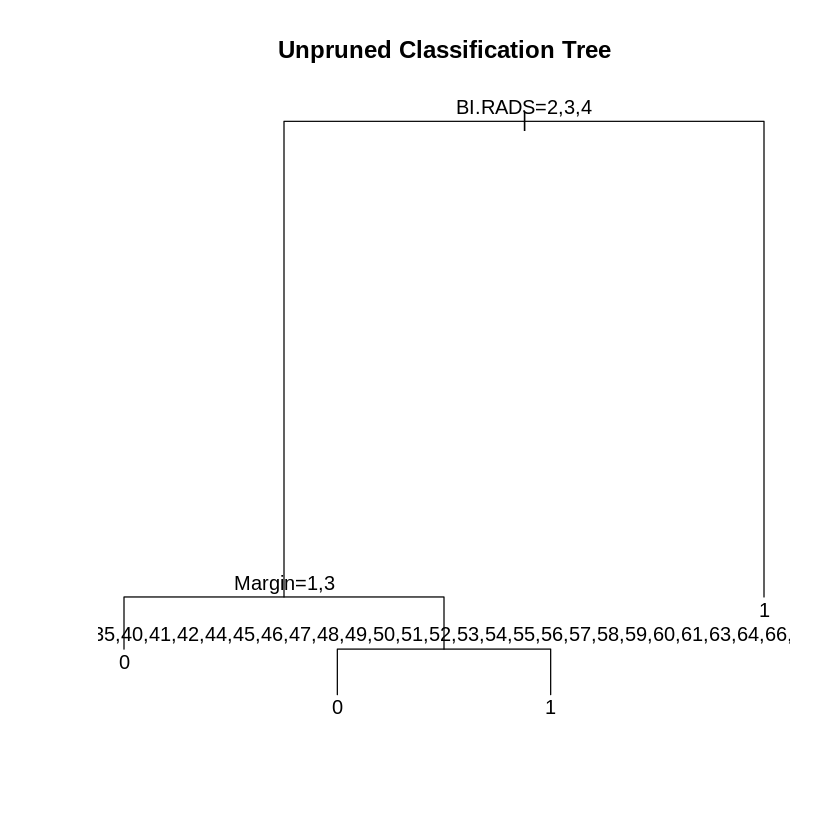

In [ ]:
plot(tree)
text(tree, pretty = 0)
title(main = "Unpruned Classification Tree")

In [ ]:
# Splitting the dataset into the Training set and Test set
set.seed(2)
idx = sample(1:nrow(dataset), 664)
trn = dataset[idx,]
tst = dataset[-idx,]
tree = rpart(Severity ~ ., data = trn)
# seat_tree = tree(Sales ~ ., data = Carseats, 
#                  control = tree.control(nobs = nrow(Carseats), minsize = 10))
summary(tree)

Call:
rpart(formula = Severity ~ ., data = trn)
  n= 664 

          CP nsplit rel error    xerror       xstd
1 0.66561514      0 1.0000000 1.0000000 0.04060234
2 0.04731861      1 0.3343849 0.3375394 0.02988658
3 0.01000000      2 0.2870662 0.3753943 0.03117658

Variable importance
BI.RADS     Age  Margin Density 
     57      22      20       1 

Node number 1: 664 observations,    complexity param=0.6656151
  predicted class=0  expected loss=0.4774096  P(node) =1
    class counts:   347   317
   probabilities: 0.523 0.477 
  left son=2 (401 obs) right son=3 (263 obs)
  Primary splits:
      BI.RADS splits as  LLLLRRR, improve=156.383200, (0 missing)
      Margin  splits as  LRRRR, improve=110.480800, (0 missing)
      Age     splits as  LLLLLLLLLLLLLLLLLLLLRLLLLLLLLLLLRLRRLLRLRRRLLRRRRRRRRRRRRRRRRLRRRRRRR, improve= 52.144720, (0 missing)
      Density splits as  LLRR, improve=  1.223165, (0 missing)
  Surrogate splits:
      Margin  splits as  LLRRR, agree=0.747, adj=0.361, (0 split

In [ ]:
trn_pred = predict(tree, trn, type = "class")
tst_pred = predict(tree, tst[(0:50),], type = "class")

In [ ]:
# train confusion
table(predicted = tst_pred, actual = tst[(0:50),]$Severity)

         actual
predicted  0  1
        0 24  8
        1  3 15